In [2]:
import math as m
import numpy as np
from typing import List, Tuple, Dict
import matplotlib.pyplot as plt
from copy import deepcopy
import time

In [3]:
class Dragonfly:
    def __init__(
        self, 
        u1: np.array(float),
        u2: np.array(float),
        u3: np.array(float),
        f: float
             ):
        self.u1 = u1
        self.u2 = u2
        self.u3 = u3
        self.f = f
        
class DragonflySwarm:
    def __init__(
        self,
        swarm_size: int,
        dim: int,
        max_iter: int,
        sep: float,
        alignmnt: float,
        cohesn: float,
        tendnsy: float,
        evatn: float,
        weight: float, 
        alpha: float,
        lmbd: float,
        radius: float,
        step_modification: int,
        const_for_modif: float
        #area: List[List[float]],
                 ):
        self.swarm_size = swarm_size
        self.dim = dim
        self.u_dim = dim - 1
        self.max_iter = max_iter
        self.current_iter = 0
        self.sep = sep
        self.alignmt = alignmnt
        self.cohesn = cohesn
        self.tendnsy = tendnsy
        self.evatn = evatn
        self.weight = weight
        self.alpha = alpha
        self.lmbd = lmbd
        self.radius = radius
        
        self.population = []
        
        self.sep_list_1 = np.zeros(self.u_dim)
        self.sep_list_2 = np.zeros(self.u_dim)
        self.sep_list_3 = np.zeros(self.u_dim)
        
        self.alig_list_1 = np.zeros(self.u_dim)
        self.alig_list_2 = np.zeros(self.u_dim)
        self.alig_list_3 = np.zeros(self.u_dim)
        
        self.coh_list_1 = np.zeros(self.u_dim)
        self.coh_list_2 = np.zeros(self.u_dim)
        self.coh_list_3 = np.zeros(self.u_dim)
        
        self.food_attract_1 = np.zeros(self.u_dim)
        self.food_attract_2 = np.zeros(self.u_dim)
        self.food_attract_3 = np.zeros(self.u_dim)
        
        self.enemy_avoid_1 = np.zeros(self.u_dim) #было array
        self.enemy_avoid_2 = np.zeros(self.u_dim)
        self.enemy_avoid_3 = np.zeros(self.u_dim)
        
        self.velocity_list_1 = []# np.zeros(self.u_dim)
        self.velocity_list_2 = []
        self.velocity_list_3 = []
        
        self.euclid_list_1 = []
        self.euclid_list_2 = []
        self.euclid_list_3 = []
        
        self.best_list= []
        self.worst_list = []
        
        self.exact = 0
        self.best_x1 = []
        self.best_x2 = []
        self.best_x3 = []
        
        self.const_for_modif = 0.5#const_for_modif
        self.step_modification = step_modification
    
    
    def init_area(self, control):
        self.area_1 = [np.array([0, 4]) for i in range(control.N_step - 1)]
        self.area_2 = [np.array([0, 4]) for i in range(control.N_step - 1)]
        self.area_3 = [np.array([0, 0.5]) for i in range(control.N_step - 1)]
        self.exact = control.ExactI()

               
    # the dims are ok now -  the problem was at the dragonfly constructor
    def form_first_pop(self, control):
        self.population.clear()
        
        for i in range(self.swarm_size):
            coordinate_1 = np.array([np.random.rand() * (self.area_1[j][1] - self.area_1[j][0]) + self.area_1[j][0] for j in range(self.u_dim)])
            coordinate_2 = np.array([np.random.rand() * (self.area_2[j][1] - self.area_2[j][0]) + self.area_2[j][0] for j in range(self.u_dim)])
            coordinate_3 = np.array([np.random.rand() * (self.area_3[j][1] - self.area_3[j][0]) + self.area_3[j][0] for j in range(self.u_dim)])
            #print(coordinate)
            result = control.Functional(coordinate_1, coordinate_2, coordinate_3)
            #print(result)
            member = Dragonfly(coordinate_1, coordinate_2, coordinate_3, result)
            self.population.append(member)      


    def generate_step_coord(self):
        self.velocity_list_1.clear()
        self.velocity_list_2.clear()
        self.velocity_list_3.clear()
        
        for i in range(self.swarm_size):
            velocty_1 = [(self.area_1[j][1] - self.area_1[j][0]) * np.random.uniform(-1, 1) / 100 for j in range(self.u_dim)]
            velocty_2 = [(self.area_2[j][1] - self.area_2[j][0]) * np.random.uniform(-1, 1) / 100 for j in range(self.u_dim)]
            velocty_3 = [(self.area_3[j][1] - self.area_3[j][0]) * np.random.uniform(-1, 1) / 100 for j in range(self.u_dim)]
            
            tmp_1 = deepcopy(velocty_1)
            tmp_2 = deepcopy(velocty_2)
            tmp_3 = deepcopy(velocty_3)
            
            self.velocity_list_1.append(tmp_1)
            self.velocity_list_2.append(tmp_2)
            self.velocity_list_3.append(tmp_3)
            
    def move_swarm(self, control):
        self.current_iter += 1
        right_area = False # same as "flag" in a previous C# code 
        
        radius_area = self.radius * self.current_iter / self.max_iter
        trunk_ = self.max_iter - self.max_iter // 2
        
        population_copy = deepcopy(self.population)
        velocity_copy_1 = deepcopy(self.velocity_list_1)
        velocity_copy_2 = deepcopy(self.velocity_list_2)
        velocity_copy_3 = deepcopy(self.velocity_list_3)
        
        for i in range(self.swarm_size):
            
            # for control vector u1
            for j in range(self.swarm_size):
                if i != j:
                    dist = np.linalg.norm(np.array(population_copy[i].u1) - np.array(population_copy[j].u1))
                    if dist <= radius_area:
                        self.euclid_list_1.append([j, dist])
            
            # for control vector u2           
            for j in range(self.swarm_size):
                if i != j:
                    dist = np.linalg.norm(np.array(population_copy[i].u2) - np.array(population_copy[j].u2))
                    if dist <= radius_area:
                        self.euclid_list_2.append([j, dist])
            
            # for control vector u3           
            for j in range(self.swarm_size):
                if i != j:
                    dist = np.linalg.norm(np.array(population_copy[i].u3) - np.array(population_copy[j].u3))
                    if dist <= radius_area:
                        self.euclid_list_3.append([j, dist])
                        
            # EUCLID u1            
            if len(self.euclid_list_1) > 1:
                self.sep_list_1 = self.separation(i, population_copy, self.euclid_list_1, self.area_1, 1)
                self.alig_list_1 = self.alignment(i, velocity_copy_1, self.euclid_list_1, self.area_1, 1)
                self.coh_list_1 = self.cohesion(i, population_copy, self.euclid_list_1, self.area_1, 1)
                self.food_attract_1 = self.tendensy(i, population_copy, self.area_1, 1)
                self.enemy_avoid_1 = self.evation(i, population_copy, self.area_1, 1)
                
                tmp_velo = np.zeros(self.u_dim)
                tmp_velo = self.velocity(i, self.sep_list_1, self.alig_list_1, self.coh_list_1, self.food_attract_1, self.enemy_avoid_1, self.velocity_list_1)
                self.velocity_list_1[i] = tmp_velo

                if (self.current_iter < trunk_):
                    tmp_list = self.find_new_position(i, 1)
                else:
                    tmp_list = self.find_new_position_mod(i, self.step_modification, 1)
                for ii in range(self.u_dim):
                    self.population[i].u1[ii] = tmp_list[ii]
                self.check_area(i, 1)
            
            else:
                self.levi_move(i, self.area_1, 1, right_area)
                self.check_area(i, 1)
            
            # EUCLID 2
            if len(self.euclid_list_2) > 1:
                self.sep_list_2 = self.separation(i, population_copy, self.euclid_list_2, self.area_2, 2)
                self.alig_list_2 = self.alignment(i, velocity_copy_2, self.euclid_list_2, self.area_2, 2)
                self.coh_list_2 = self.cohesion(i, population_copy, self.euclid_list_2, self.area_2, 2)
                self.food_attract_2 = self.tendensy(i, population_copy, self.area_2, 2)
                self.enemy_avoid_2 = self.evation(i, population_copy, self.area_2, 2)
                
                tmp_velo = np.zeros(self.u_dim)
                tmp_velo = self.velocity(i, self.sep_list_2, self.alig_list_2, self.coh_list_2, self.food_attract_2, self.enemy_avoid_2, self.velocity_list_2)
                self.velocity_list_2[i] = tmp_velo
                
                if (self.current_iter < trunk_):
                    tmp_list = self.find_new_position(i, 2)
                else:
                    tmp_list = self.find_new_position_mod(i, self.step_modification, 2)
                for ii in range(self.u_dim):
                    self.population[i].u2[ii] = tmp_list[ii]
                self.check_area(i, 2)
            
            else:
                self.levi_move(i, self.area_2, 2, right_area)
                self.check_area(i, 2)
            
            # EUCLID 3
            if len(self.euclid_list_3) > 1:
                self.sep_list_3 = self.separation(i, population_copy, self.euclid_list_3, self.area_3, 3)
                self.alig_list_3 = self.alignment(i, velocity_copy_3, self.euclid_list_3, self.area_3, 3)
                self.coh_list_3 = self.cohesion(i, population_copy, self.euclid_list_3, self.area_3, 3)
                self.food_attract_3 = self.tendensy(i, population_copy, self.area_3, 3)
                self.enemy_avoid_3 = self.evation(i, population_copy, self.area_3, 3)
                
                tmp_velo = np.zeros(self.u_dim)
                tmp_velo = self.velocity(i, self.sep_list_3, self.alig_list_3, self.coh_list_3, self.food_attract_3, self.enemy_avoid_3, self.velocity_list_3)
                self.velocity_list_3[i] = tmp_velo #self.velocity_list.append(self.velocity(i))
                
                if (self.current_iter < trunk_):
                    tmp_list = self.find_new_position(i, 3)
                else:
                    tmp_list = self.find_new_position_mod(i, self.step_modification, 3)
                for ii in range(self.u_dim):
                    self.population[i].u3[ii] = tmp_list[ii]
                self.check_area(i, 3)
            else:
                self.levi_move(i, self.area_3, 3, right_area)
                self.check_area(i, 3)
                
            self.population[i].f = control.Functional(self.population[i].u1, self.population[i].u2, self.population[i].u3)
            self.euclid_list_1.clear()
            self.euclid_list_2.clear()
            self.euclid_list_3.clear()
    
    
    def separation(self, it, population_copy, euclid_list_, area, number):
        tmp = np.zeros(self.u_dim)
        flag = 0
        if number == 1:
            for indx, dist in euclid_list_:
                tmp += (np.array(population_copy[it].u1) - np.array(population_copy[indx].u1))
        if number == 2:
            for indx, dist in euclid_list_:
                tmp += (np.array(population_copy[it].u2) - np.array(population_copy[indx].u2))
        if number == 3:
            for indx, dist in euclid_list_:
                tmp += (np.array(population_copy[it].u3) - np.array(population_copy[indx].u3))
        for i in range(self.u_dim):
            area_tmp = area[i][1] - area[i][0]
            if(np.abs(tmp[i]) >= (area_tmp / 4)):
                flag += 1
        if flag != 0:
            tmp = tmp / 400
        tmp = -tmp
        return tmp
    
    def alignment(self, it, velocity_copy, euclid_list_, area, number):
        tmp = np.zeros(self.u_dim)
        flag = 0
        if number == 1:
            for indx, dist in euclid_list_:
                tmp_velo = np.array(velocity_copy[indx])
                tmp += tmp_velo
        if number == 2:
            for indx, dist in euclid_list_:
                tmp_velo = np.array(velocity_copy[indx])
                tmp += tmp_velo
        if number == 3:
            for indx, dist in euclid_list_:
                tmp_velo = np.array(velocity_copy[indx])
                tmp += tmp_velo
        tmp = tmp / len(euclid_list_)
        for i in range(self.u_dim):
            area_tmp = area[i][1] - area[i][0]
            if(np.abs(tmp[i]) >= (area_tmp / 4)):
                flag += 1
        if flag != 0:
            tmp = tmp / 400
        return tmp
    
    def cohesion(self, it, population_copy, euclid_list_, area, number):
        tmp = np.zeros(self.u_dim)
        flag = 0
        if number == 1:
            for indx, dist in euclid_list_:
                tmp += np.array(population_copy[indx].u1)
            tmp = tmp / len(euclid_list_) - np.array(population_copy[it].u1)
        if number == 2:
            for indx, dist in euclid_list_:
                tmp += np.array(population_copy[indx].u2)
            tmp = tmp / len(euclid_list_) - np.array(population_copy[it].u2)
        if number == 3:
            for indx, dist in euclid_list_:
                tmp += np.array(population_copy[indx].u3)
            tmp = tmp / len(euclid_list_) - np.array(population_copy[it].u3)
        for i in range(self.u_dim):
            area_tmp = area[i][1] - area[i][0]
            if(np.abs(tmp[i]) >= (area_tmp / 4)):
                flag += 1
        if flag != 0:
            tmp = tmp / 400
        return tmp
    
    def tendensy(self, it, population_copy, area, number):
        tmp = np.zeros(self.u_dim)
        flag = 0
        best_p = max(population_copy, key=lambda member: member.f)
        if number == 1:
            tmp = np.array(best_p.u1) - np.array(population_copy[it].u1)
        if number == 2:
            tmp = np.array(best_p.u2) - np.array(population_copy[it].u2)
        if number == 3:
            tmp = np.array(best_p.u3) - np.array(population_copy[it].u3)
        for i in range(self.u_dim):
            area_tmp = area[i][1] - area[i][0]
            if(np.abs(tmp[i] ) >= (area_tmp / 4)):
                flag += 1
        if flag != 0:
            tmp = tmp / 400
        return tmp
    
    def evation(self, it, population_copy, area, number):
        tmp = np.zeros(self.u_dim)
        flag = 0
        worst_p = min(population_copy, key=lambda member: member.f)
        if number == 1:
            tmp = np.array(worst_p.u1) + np.array(population_copy[it].u1)
        if number == 2:
            tmp = np.array(worst_p.u2) + np.array(population_copy[it].u2)
        if number == 3:
            tmp = np.array(worst_p.u3) + np.array(population_copy[it].u3)
        for i in range(self.u_dim):
            area_tmp = area[i][1] - area[i][0]
            if(np.abs(tmp[i]) >= (area_tmp / 4)):
                flag += 1
        if flag != 0:
            tmp = tmp / 400
        return tmp
    
    
    def velocity(self, it, sep_list, alig_list, coh_list, food_attract, enemy_avoid, velocity_list):
        S = self.sep * np.array(sep_list)
        A = self.alignmt * np.array(alig_list)
        C = self.cohesn * np.array(coh_list)
        F = self.tendnsy * np.array(food_attract)
        E = self.evatn * np.array(enemy_avoid)
        W = self.weight * np.array(velocity_list[it])
        tmp_velocity = S + A + C + F + E + W
        return tmp_velocity
    
    def find_new_position(self, it, number):
        if number == 1:
            tmp = np.array(self.population[it].u1) + np.array(self.velocity_list_1[it])
        if number == 2:
            tmp = np.array(self.population[it].u2) + np.array(self.velocity_list_2[it])
        if number == 3:
            tmp = np.array(self.population[it].u3) + np.array(self.velocity_list_3[it])
        return tmp
    
    def find_new_position_mod(self, it, modif, number):
        if number == 1:
            if modif == 0:
                tmp = np.array(self.population[it].u1) + np.array(self.velocity_list_1[it]) / it
            elif modif == 1:
                tmp = np.array(self.population[it].u1) + np.array(self.velocity_list_1[it]) / m.log(it+2)
            elif modif == 2:
                tmp = np.array(self.population[it].u1) + np.array(self.velocity_list_1[it]) * m.log(0.8) / m.log(it+2)
            elif modif == 3:
                tmp = np.array(self.population[it].u1) + np.array(self.velocity_list_1[it]) * m.exp((self.const_for_modif - 1) * it)
            elif modif == 4:
                tmp = np.array(self.population[it].u1) + np.array(self.velocity_list_1[it])
        if number == 2:
            if modif == 0:
                tmp = np.array(self.population[it].u2) + np.array(self.velocity_list_2[it]) / it
            elif modif == 1:
                tmp = np.array(self.population[it].u2) + np.array(self.velocity_list_2[it]) / m.log(it+2)
            elif modif == 2:
                tmp = np.array(self.population[it].u2) + np.array(self.velocity_list_2[it]) * m.log(0.8) / m.log(it+2)
            elif modif == 3:
                tmp = np.array(self.population[it].u2) + np.array(self.velocity_list_2[it]) * m.exp((self.const_for_modif - 1) * it)
            elif modif == 4:
                tmp = np.array(self.population[it].u2) + np.array(self.velocity_list_2[it])
        if number == 3:
            if modif == 0:
                tmp = np.array(self.population[it].u3) + np.array(self.velocity_list_3[it]) / it
            elif modif == 1:
                tmp = np.array(self.population[it].u3) + np.array(self.velocity_list_3[it]) / m.log(it+2)
            elif modif == 2:
                tmp = np.array(self.population[it].u3) + np.array(self.velocity_list_3[it]) * m.log(0.8) / m.log(it+2)
            elif modif == 3:
                tmp = np.array(self.population[it].u3) + np.array(self.velocity_list_3[it]) * m.exp((self.const_for_modif - 1) * it)
            elif modif == 4:
                tmp = np.array(self.population[it].u3) + np.array(self.velocity_list_3[it])
        return tmp
            
    def check_area(self, it, number): #fixed
        if number == 1:
            for j in range(self.u_dim):
                if (self.population[it].u1[j] < self.area_1[j][0]):
                    self.population[it].u1[j] = self.area_1[j][0] + (self.area_1[j][0] - self.population[it].u1[j])
                elif (self.population[it].u1[j] > self.area_1[j][1]):
                    self.population[it].u1[j] = self.area_1[j][1] + (self.area_1[j][1] - self.population[it].u1[j])
                    
        elif number == 2:
            for j in range(self.u_dim):
                if (self.population[it].u2[j] < self.area_2[j][0]):
                    self.population[it].u2[j] = self.area_2[j][0] + (self.area_2[j][0] - self.population[it].u2[j])
                elif (self.population[it].u2[j] > self.area_2[j][1]):
                    self.population[it].u2[j] = self.area_2[j][1] + (self.area_2[j][1] - self.population[it].u2[j])
                    
        elif number == 3:
            for j in range(self.u_dim):
                if (self.population[it].u3[j] < self.area_3[j][0]):
                    self.population[it].u3[j] = self.area_3[j][0] + (self.area_3[j][0] - self.population[it].u3[j])   
                elif (self.population[it].u3[j] > self.area_3[j][1]):
                    self.population[it].u3[j] = self.area_3[j][1] + (self.area_3[j][1] - self.population[it].u3[j])

    def levi_move(self, it, area, number, right_area):
        half_set = int((self.u_dim) / 2)
        r_parameter = []
        theta = []
        l_parameter = []
        xi_parameter = []

        for ii in range(self.u_dim):
            iterator_0 = 0
            while not right_area:
                r_parameter.append(np.random.rand() * (area[ii][1] - area[ii][0]) + area[ii][0])
                theta.append(r_parameter[len(r_parameter) - 1] * 2 * np.pi)
                l_parameter.append(r_parameter[len(r_parameter) - 1] ** self.lmbd)

                if ii < half_set:
                    xi_parameter.append(l_parameter[len(l_parameter) - 1] * np.sin(theta[len(theta) - 1]))
                else:
                    xi_parameter.append(l_parameter[len(l_parameter) - 1] * np.cos(theta[len(theta) - 1]))
                    
                if number == 1:
                    check_obl = np.array(self.population[it].u1[ii]) + (self.alpha / (self.current_iter + 1)) * xi_parameter[len(xi_parameter) - 1]
                if number == 2:
                    check_obl = np.array(self.population[it].u2[ii]) + (self.alpha / (self.current_iter + 1)) * xi_parameter[len(xi_parameter) - 1]
                if number == 3:
                    check_obl = np.array(self.population[it].u3[ii]) + (self.alpha / (self.current_iter + 1)) * xi_parameter[len(xi_parameter) - 1]
                if (check_obl < area[ii][0]) or (check_obl > area[ii][1]):
                    right_area = False
                    if iterator_0 > 100:
                        check_obl = np.abs(check_obl) / 2
                        right_area = True
                        break      
                else:
                    right_area = True
                iterator_0 += 1
            right_area = False
            if number == 1:
                self.population[it].u1[ii] = (self.population[it].u1[ii]) + (self.alpha / (self.current_iter + 1)) * xi_parameter[len(xi_parameter) - 1]
            if number == 2:
                self.population[it].u2[ii] = (self.population[it].u2[ii]) + (self.alpha / (self.current_iter + 1)) * xi_parameter[len(xi_parameter) - 1]
            if number == 3:
                self.population[it].u3[ii] = (self.population[it].u3[ii]) + (self.alpha / (self.current_iter + 1)) * xi_parameter[len(xi_parameter) - 1]

            
    def find_best(self):
        return max(self.population, key=lambda dragonfly: dragonfly.f)
    
    def find_worst(self):
        return min(self.population, key=lambda dragonfly: dragonfly.f)
    
    def Work(self, control):
        start = time.monotonic()
        time.sleep(0.1)
        
        self.init_area(control)
        self.form_first_pop(control)
        self.generate_step_coord()

        best = self.find_best()
        member_temp = deepcopy(best)
        self.best_list.append(member_temp)
        
        worst = self.find_worst()
        member_temp = deepcopy(worst)
        self.worst_list.append(member_temp)
        
        
        for i in range(self.max_iter):
            
            self.move_swarm(control)
            
            best_temp = self.find_best()
            tmp1 = deepcopy(best_temp.u1)
            tmp2 = deepcopy(best_temp.u2)
            tmp3 = deepcopy(best_temp.u3)
            member_temp = Dragonfly(tmp1, tmp2, tmp3, best_temp.f)
            self.best_list.append(member_temp)
            
            worst_temp = self.find_worst()
            tmp1 = deepcopy(worst_temp.u1)
            tmp2 = deepcopy(worst_temp.u2)
            tmp3 = deepcopy(worst_temp.u3)
            member_temp = Dragonfly(tmp1, tmp2, tmp3, worst_temp.f)
            self.worst_list.append(member_temp)
            
        self.best_list.sort(reverse=True, key=lambda dragonfly: dragonfly.f)
        self.worst_list.sort(key=lambda dragonfly: dragonfly.f)
        
        self.make_best_x(self.worst_list[0].u1, self.worst_list[0].u2, self.worst_list[0].u3)
        #self.make_best_x(self.best_list[0].u1, self.best_list[0].u2, self.best_list[0].u3)
        self.draw_plots()
        
#         print('U:')
#         print(self.worst_list[0].u1)
#         print(self.worst_list[0].u2)
#         print(self.worst_list[0].u3)
        print('I = ', self.worst_list[0].f)
        print('I_exact = 258,3393')
        print('Error: ', self.worst_list[0].f - 258.3393)
        end = time.monotonic()
        print('work time : {:>9.2f}'.format(end-start))
    
    def make_best_x(self, u1, u2, u3):
        self.best_x1.clear()
        self.best_x2.clear()
        self.best_x3.clear()
        self.best_x1.append(2)
        self.best_x2.append(5)
        self.best_x3.append(7)
        
        for i in range(1, self.dim):
            x1_temp = self.best_x1[i - 1] / (1 + 0.01 * u1[i - 1] * (3 + u2[i - 1]))
            x2_temp = (self.best_x2[i - 1] + u1[i - 1] * x1_temp) / (1 + u1[i - 1] * (1 + u2[i - 1]))
            x3_temp = self.best_x3[i - 1] / (1 + 0.01 * u1[i - 1] * (1 + u3[i - 1]))
            self.best_x1.append(x1_temp)
            self.best_x2.append(x2_temp)
            self.best_x3.append(x3_temp)
        
        self.best_x1 = np.array(self.best_x1)
        self.best_x2 = np.array(self.best_x2)
        self.best_x3 = np.array(self.best_x3)
    
    def draw_plots(self):
        plt.figure(figsize=(18, 10))
        
        plt.subplot(2,3,1)
        plt.plot(self.best_list[0].u1, '.')
        plt.ylabel('u1')
        plt.xlabel('t')
        
        plt.subplot(2,3,2)
        plt.plot(self.best_list[0].u2, '.')
        plt.ylabel('u2')
        plt.xlabel('t')
        
        plt.subplot(2,3,3)
        plt.plot(self.best_list[0].u3, '.')
        plt.ylabel('u3')
        plt.xlabel('t')

        plt.subplot(2,3,4)
        plt.plot(self.best_x1, '.')
        plt.ylabel('$x_{1}$')
        plt.xlabel('t')

        plt.subplot(2,3,5)
        plt.plot(self.best_x2, '.')
        plt.ylabel('$x_{2}$')
        plt.xlabel('t')
        
        plt.subplot(2,3,6)
        plt.plot(self.best_x3, '.')
        plt.ylabel('$x_{3}$')
        plt.xlabel('t')

        plt.show()
            

In [4]:
class LuusTassonTask:
    def __init__(
    self, 
    N_step: int,
    ):
        self.N_step = N_step # N is the dimention of the x, dim for u is the N-1

    def make_x(self, u1, u2, u3):
        x1 = []
        x2 = []
        x3 = []
        x1.append(2)
        x2.append(5)
        x3.append(7)
        for i in range(1, self.N_step):
            x1_temp = x1[i - 1] / (1 + 0.01 * u1[i - 1] * (3 + u2[i - 1]))
            x2_temp = (x2[i - 1] + u1[i - 1] * x1_temp) / (1 + u1[i - 1] * (1 + u2[i - 1]))
            x3_temp = x3[i - 1] / (1 + 0.01 * u1[i - 1] * (1 + u3[i - 1]))
            x1.append(x1_temp)
            x2.append(x2_temp)
            x3.append(x3_temp)
        x1 = np.array(x1)
        x2 = np.array(x2)
        x3 = np.array(x3)
        return x1, x2, x3

    def Functional(self, u1, u2, u3):
        x1 = []
        x2 = []
        x3 = []
        u1 = np.array(u1)
        u2 = np.array(u2)
        u3 = np.array(u3)
        x1, x2, x3 = self.make_x(u1, u2, u3)
        N = self.N_step - 1

        
        temp_1 = 0
        for i in range(1, self.N_step):
            temp_1 += (x1[i - 1]**2 + x2[i - 1]**2 + 2 * u3[i - 1]**2)
        
        temp_2 = 0
        for i in range(1, self.N_step):
            temp_2 += (x3[i - 1]**2 + 2 * u1[i - 1]**2 + 2 * u2[i - 1]**2)
            
        temp = x1[N]**2 + x2[N]**2 + x3[N]**2 + (temp_1 * temp_2)**0.5
        return temp
        
        
    def ExactI(self):
        return 

In [47]:
def print_some(list_):
    for indx in range(len(list_)):
        print('iter: ',indx, '   ', list_[indx].u1, list_[indx].u2, list_[indx].u3, list_[indx].f)

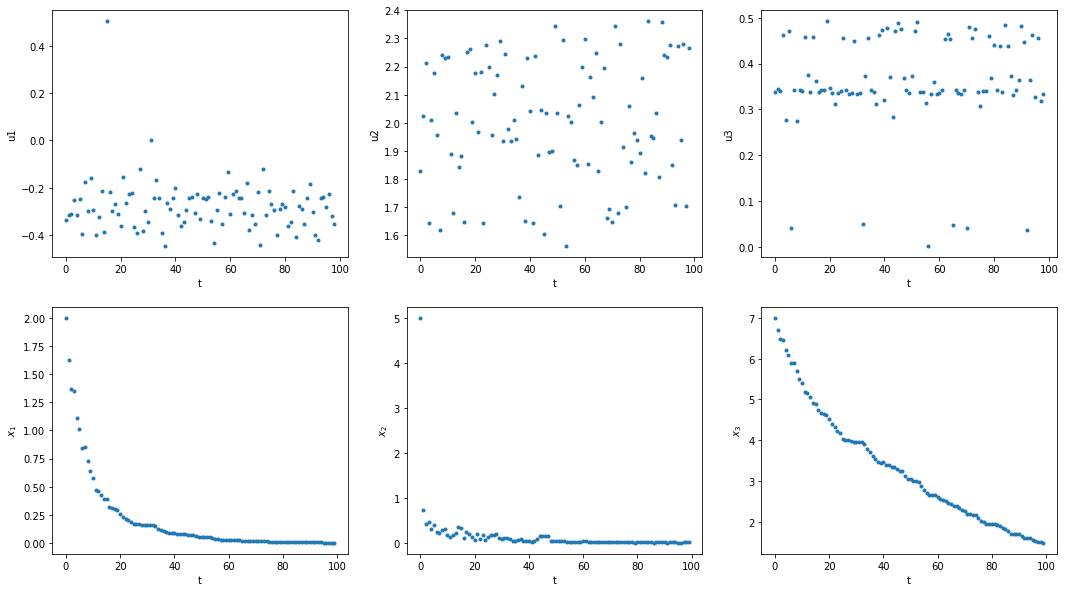

I =  353.883135602944
I_exact = 258,3393
Error:  95.543835602944
work time :    474.99


In [41]:
a = LuusTassonTask(100)
algorithm = DragonflySwarm(10, a.N_step, 12000, 0.6, 0.4, 0.75, 0.6, 0.7, 0.8, 1, 1, 100000, 2, 0.5)
algorithm.Work(a)

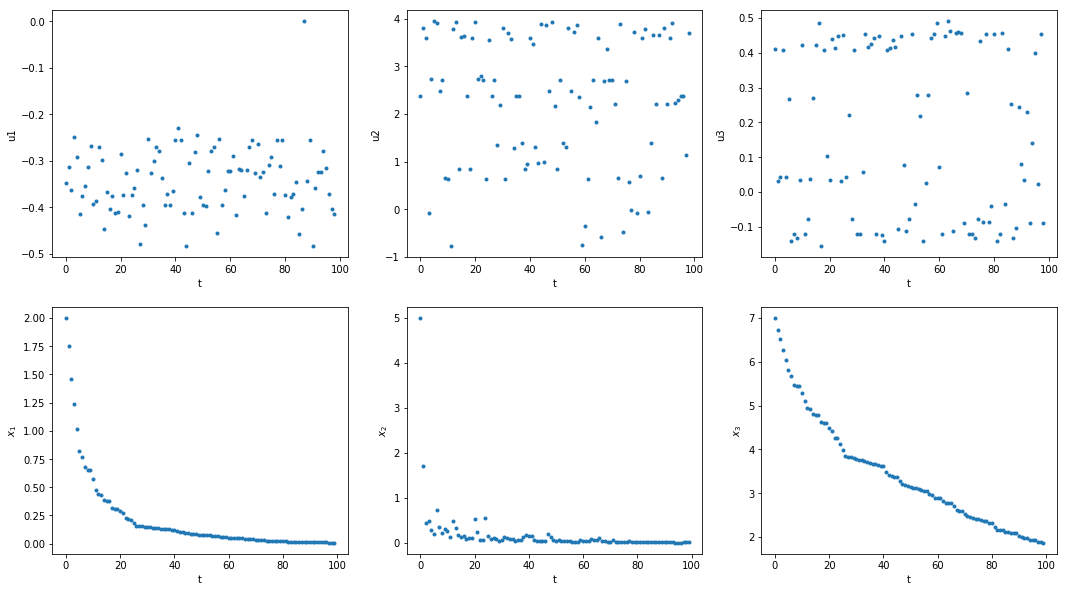

I =  358.9900541817074
I_exact = 258,3393
Error:  100.65075418170744
work time :    634.13


In [48]:
a1 = LuusTassonTask(100)
algorithm1 = DragonflySwarm(10, a.N_step, 15000, 0.6, 0.4, 0.75, 0.54, 0.7, 0.8, 1, 1, 100000, 2, 0.5)
algorithm1.Work(a1)

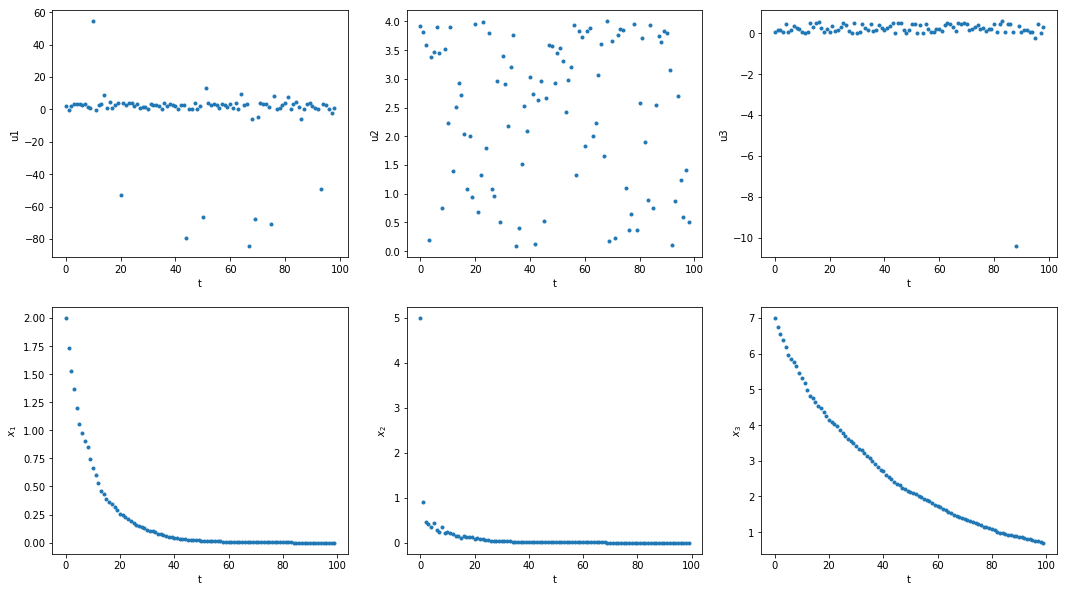

I =  395.0337728312933
I_exact = 258,3393
Error:  136.6944728312933
work time :   6560.03


In [70]:
a2 = LuusTassonTask(100)
algorithm2 = DragonflySwarm(100, a2.N_step, 150, 0.6, 0.4, 0.75, 0.54, 0.7, 0.8, 1, 1, 100000, 2, 0.5)
algorithm2.Work(a2)

In [67]:
algorithm2.best_list[0].u1

array([2.98756727e-02, 1.83927113e-01, 2.49405533e-02, 6.00496175e-02,
       9.20031235e-02, 2.13245184e-01, 6.93539539e-02, 5.77390639e-02,
       6.03650847e-02, 8.07896114e-03, 1.32158611e-01, 1.88310484e-01,
       1.16579687e-01, 1.68310152e-01, 7.90075465e-02, 1.65636958e-01,
       1.27289855e+00, 1.07767133e-01, 1.88282329e-01, 2.99449629e-01,
       2.20282196e-01, 7.67438031e-02, 3.41231620e-01, 5.91464268e-01,
       1.03645196e-01, 3.98125358e-02, 2.21121709e-01, 3.82262980e-02,
       2.01559712e-02, 3.09493407e-01, 4.89358366e-02, 2.97624315e-01,
       1.08175164e+00, 6.52967551e-02, 1.35337165e-01, 2.08246106e-01,
       2.09288643e-01, 2.58507685e-01, 4.96572697e-02, 6.54669840e-02,
       1.93962161e-02, 2.73799031e-01, 1.06282642e-01, 3.17276386e+00,
       6.55003164e-02, 3.43852273e-01, 1.16514997e-01, 9.46859894e-02,
       2.23046844e-01, 2.53686790e-01, 7.58355952e-02, 3.28704544e-01,
       3.43229707e-02, 3.97511851e+00, 2.88042898e+00, 2.71167653e-01,
      

In [68]:
algorithm2.best_list[0].u2

array([2.10425415e-01, 6.09125058e-02, 7.29046113e-01, 3.99359347e-01,
       3.23072727e-02, 3.21683189e-01, 2.31339465e-01, 7.96012606e-02,
       4.55459634e-02, 3.08505024e-01, 1.95780479e-01, 2.66628899e-01,
       1.99820937e-02, 2.04430833e-02, 2.15960153e+00, 3.01992466e-01,
       4.68547741e-02, 9.08147398e-02, 4.73387918e-01, 9.00661635e-02,
       7.21642932e-02, 1.62938371e-01, 2.07086696e-01, 2.28725936e-01,
       2.61372901e-01, 1.10738506e-01, 6.69383294e-02, 1.14589562e-01,
       8.80058277e-02, 1.68019701e-01, 1.40912728e-01, 1.89905846e-01,
       3.96293552e+00, 2.69483687e-01, 7.15472193e-03, 3.27906778e-02,
       1.77767582e-04, 1.67005381e-01, 3.15626870e-01, 4.62269684e-01,
       1.13538980e-01, 2.36261031e-01, 4.81389442e-01, 2.78290868e-01,
       2.83561053e-02, 2.67605114e-01, 4.53344609e-01, 1.30211780e-01,
       2.53499048e-01, 2.18452483e-01, 2.63622724e-01, 4.30346052e-02,
       9.53701289e-02, 1.09059153e-01, 3.22538956e-01, 3.95059958e-01,
      

In [69]:
algorithm2.best_list[0].u3

array([0.06366892, 0.0166626 , 0.02121585, 0.0451802 , 0.00120493,
       0.00533079, 0.02392915, 0.01086382, 0.04695736, 0.01804158,
       0.05360707, 0.03765675, 0.03700598, 0.04791776, 0.06555845,
       0.25167496, 0.0415052 , 0.01006678, 0.42659809, 0.03981792,
       0.00585524, 0.02708764, 0.04420711, 0.0125728 , 0.00501975,
       0.03477601, 0.020232  , 0.02855304, 0.00495456, 0.01570647,
       0.01973561, 0.04695141, 0.03335829, 0.04464887, 0.0100453 ,
       0.04728855, 0.49383715, 0.01329396, 0.03601121, 0.04399259,
       0.04558071, 0.02524312, 0.04027799, 0.03935559, 0.04071026,
       0.00062969, 0.02253615, 0.05757656, 0.01591146, 0.01167023,
       0.03603028, 0.04268724, 0.04178452, 0.03411677, 0.49978413,
       0.00136794, 0.0260498 , 0.02602068, 0.00997729, 0.01174038,
       0.00480685, 0.01732744, 0.00119586, 0.01928709, 0.02177832,
       0.49996692, 0.00410429, 0.00552647, 0.00516433, 0.01988015,
       0.04636048, 0.01766546, 0.04413905, 0.00433887, 0.02547

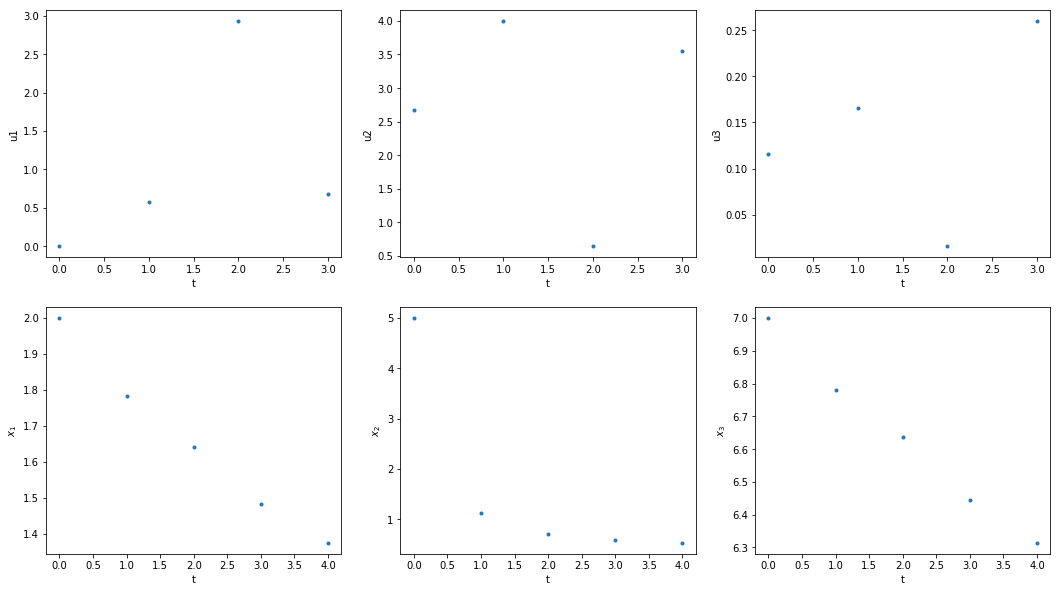

I =  139.63153773407024
I_exact = 258,3393
Error:  -118.70776226592974
work time :      2.73


In [5]:
a = LuusTassonTask(5)
algorithm = DragonflySwarm(50, a.N_step, 20, 0.6, 0.4, 0.75, 0.6, 0.7, 0.8, 1, 1, 100000, 2, 0.5)
algorithm.Work(a)

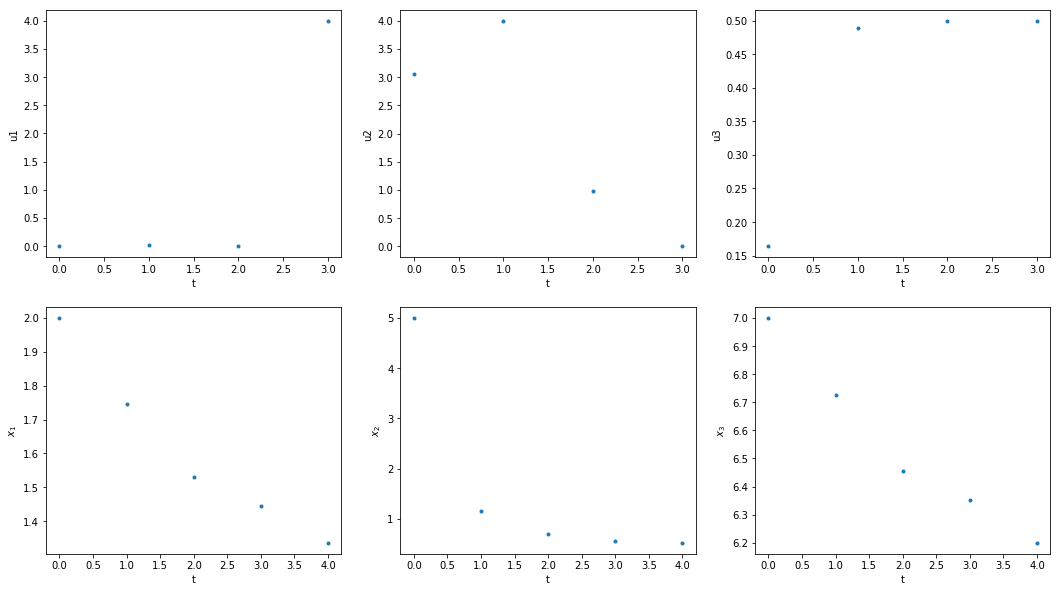

I =  139.26200805426262
I_exact = 258,3393
Error:  -119.07729194573736
work time :     14.99


In [7]:
a = LuusTassonTask(5)
algorithm = DragonflySwarm(50, a.N_step, 120, 0.6, 0.4, 0.75, 0.6, 0.7, 0.8, 1, 1, 100000, 2, 0.5)
algorithm.Work(a)

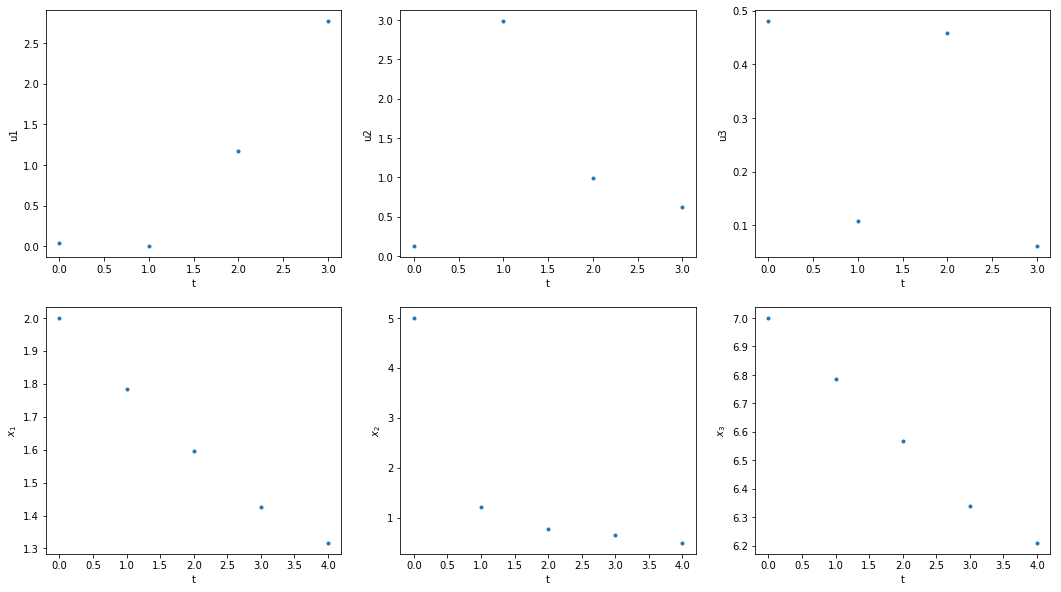

I =  139.60182392845368
I_exact = 258,3393
Error:  -118.7374760715463
work time :     20.45


In [8]:
a = LuusTassonTask(5)
algorithm = DragonflySwarm(150, a.N_step, 20, 0.6, 0.4, 0.75, 0.6, 0.7, 0.8, 1, 1, 100000, 2, 0.5)
algorithm.Work(a)

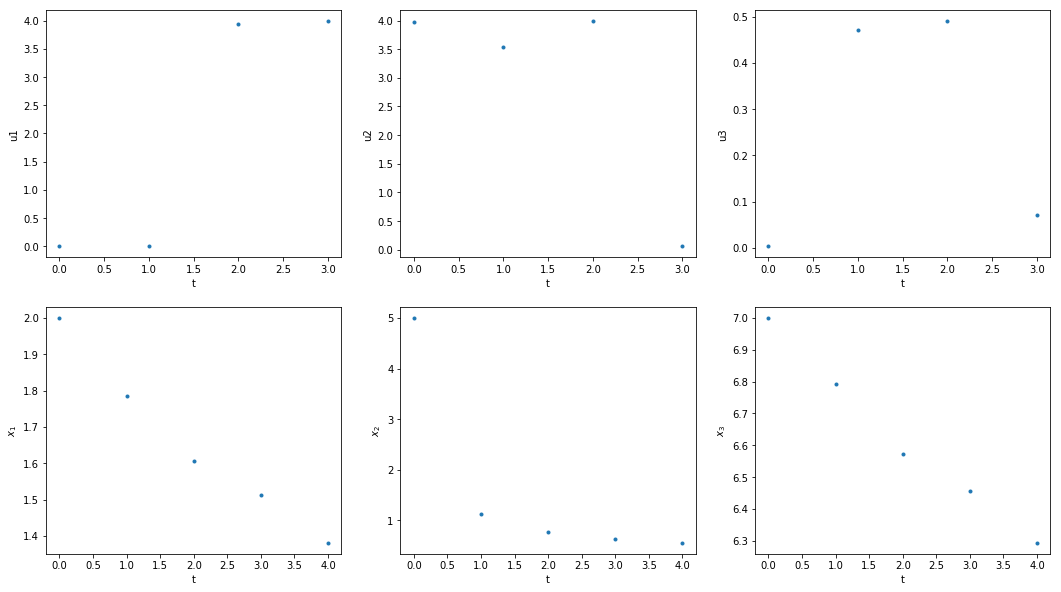

I =  139.4104992535959
I_exact = 258,3393
Error:  -118.92880074640408
work time :    114.94


In [6]:
a = LuusTassonTask(5)
algorithm = DragonflySwarm(150, a.N_step, 120, 0.6, 0.4, 0.75, 0.6, 0.7, 0.8, 1, 1, 100000, 2, 0.5)
algorithm.Work(a)

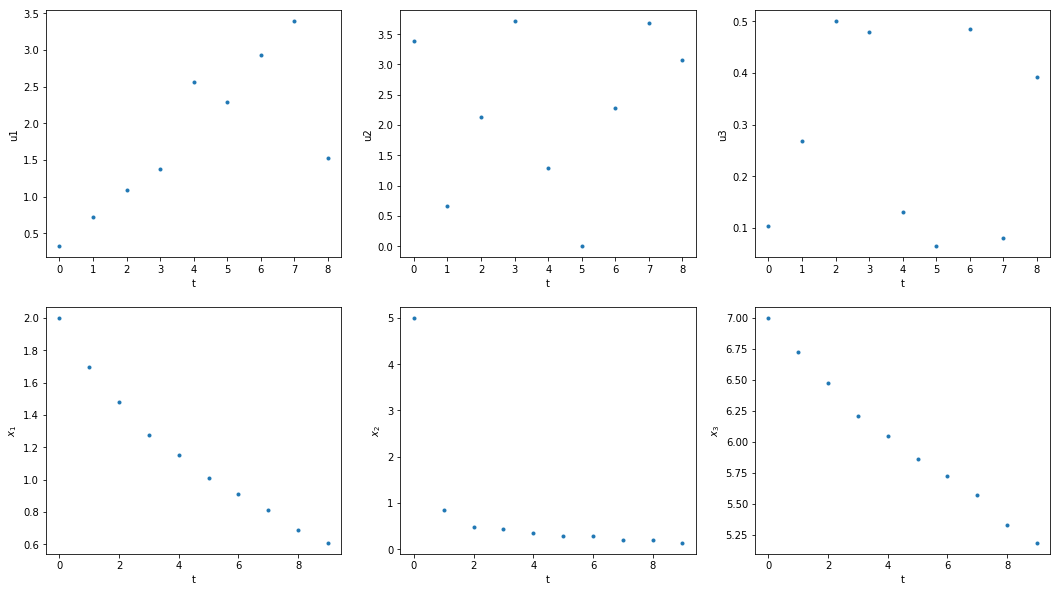

I =  186.61204072561372
I_exact = 258,3393
Error:  -71.72725927438626
work time :      0.96


In [9]:
a = LuusTassonTask(10)
algorithm = DragonflySwarm(15, a.N_step, 20, 0.6, 0.4, 0.75, 0.6, 0.7, 0.8, 1, 1, 100000, 2, 0.5)
algorithm.Work(a)

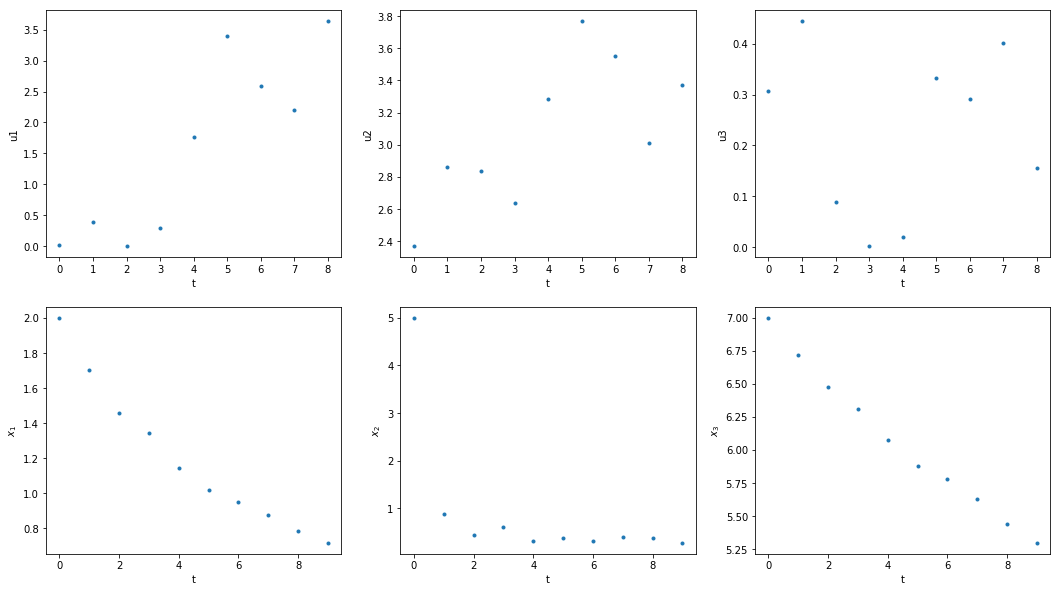

I =  180.9703051239677
I_exact = 258,3393
Error:  -77.36899487603227
work time :     24.43


In [10]:
a = LuusTassonTask(10)
algorithm = DragonflySwarm(150, a.N_step, 20, 0.6, 0.4, 0.75, 0.6, 0.7, 0.8, 1, 1, 100000, 2, 0.5)
algorithm.Work(a)

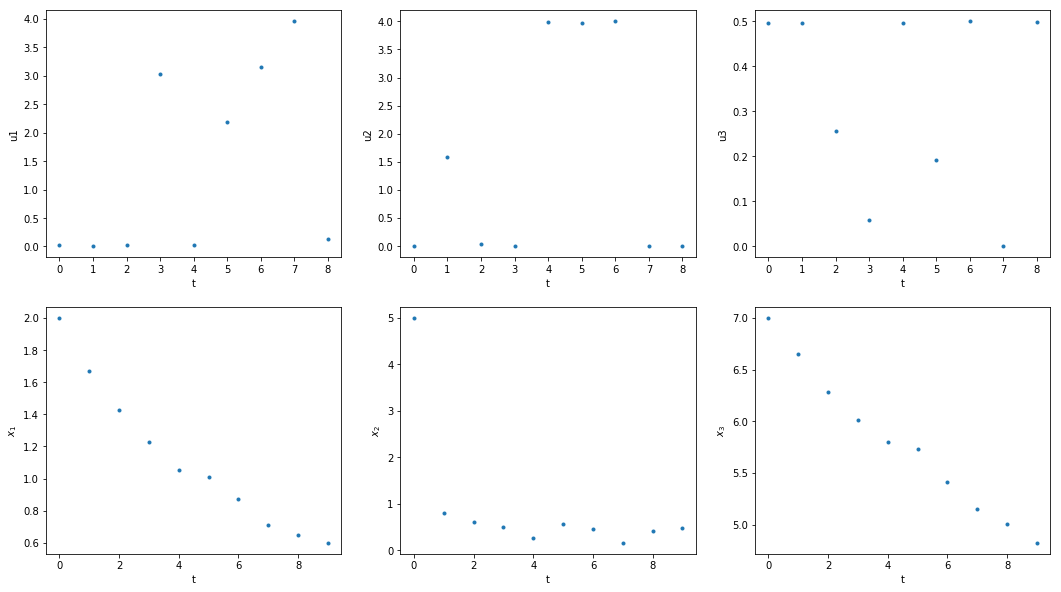

I =  182.4080279994002
I_exact = 258,3393
Error:  -75.93127200059979
work time :     27.36


In [11]:
a = LuusTassonTask(10)
algorithm = DragonflySwarm(70, a.N_step, 120, 0.6, 0.4, 0.75, 0.6, 0.7, 0.8, 1, 1, 100000, 2, 0.5)
algorithm.Work(a)